In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#    -Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#    -City, country, and date
#    -Latitude and longitude
#    -Maximum temperature
#    -Humidity
#    -Cloudiness
#    -Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c95f0d0ef08ff2d83b62b6ee1847479


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(10)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lima
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | kendal
Processing Record 6 of Set 1 | nabire
Processing Record 7 of Set 1 | weiser
Processing Record 8 of Set 1 | mrirt
City not found. Skipping...
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | balkhash
Processing Record 11 of Set 1 | el prat de llobregat
Processing Record 12 of Set 1 | kilindoni
Processing Record 13 of Set 1 | pangai
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | chapais
Processing Record 17 of Set 1 | ambulu
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | saint-philippe
Proce

Processing Record 39 of Set 4 | broken hill
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | ust-kuyga
Processing Record 42 of Set 4 | yarkovo
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | daulatpur
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | qaanaaq
Processing Record 47 of Set 4 | jinchang
Processing Record 48 of Set 4 | amapa
Processing Record 49 of Set 4 | lagos
Processing Record 50 of Set 4 | karpogory
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | mabaruma
Processing Record 3 of Set 5 | pavilosta
Processing Record 4 of Set 5 | chulman
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | kandrian
Processing Record 7 of Set 5 | huarmey
Processing Record 8 of Set 5 | pokrovsk
Processing Record 9 of Set 5 | kruisfontein
Processing Record 10 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 5 | lebu
Processing Record 12 of Set

Processing Record 28 of Set 8 | nkowakowa
Processing Record 29 of Set 8 | paka
Processing Record 30 of Set 8 | pingliang
Processing Record 31 of Set 8 | angoche
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | flin flon
Processing Record 34 of Set 8 | laela
Processing Record 35 of Set 8 | tacuarembo
Processing Record 36 of Set 8 | bandiagara
Processing Record 37 of Set 8 | salmas
Processing Record 38 of Set 8 | arawa
Processing Record 39 of Set 8 | zapolyarnyy
Processing Record 40 of Set 8 | cambara
Processing Record 41 of Set 8 | ziarat
Processing Record 42 of Set 8 | wichita falls
Processing Record 43 of Set 8 | yeniseysk
Processing Record 44 of Set 8 | hami
Processing Record 45 of Set 8 | teya
Processing Record 46 of Set 8 | geraldton
Processing Record 47 of Set 8 | ginda
Processing Record 48 of Set 8 | litovko
Processing Record 49 of Set 8 | krasnoselkup
Processing Record 50 of Set 8 | luderitz
Processing Record 1 of Set 9 | khandyga
Processing Record 2 of

Processing Record 16 of Set 12 | lorengau
Processing Record 17 of Set 12 | oliveira dos brejinhos
Processing Record 18 of Set 12 | mae sot
Processing Record 19 of Set 12 | nuuk
Processing Record 20 of Set 12 | faya
Processing Record 21 of Set 12 | zlobin
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | bakchar
Processing Record 24 of Set 12 | torres
Processing Record 25 of Set 12 | ust-tarka
Processing Record 26 of Set 12 | muros
Processing Record 27 of Set 12 | matagami
Processing Record 28 of Set 12 | sulangan
Processing Record 29 of Set 12 | shenxian
Processing Record 30 of Set 12 | washington
Processing Record 31 of Set 12 | gold coast
Processing Record 32 of Set 12 | takoradi
Processing Record 33 of Set 12 | makakilo city
Processing Record 34 of Set 12 | rocha
Processing Record 35 of Set 12 | buchanan
Processing Record 36 of Set 12 | sur
Processing Record 37 of Set 12 | chagda
City not found. Skipping...
Processing Record 38 of Set 12 | libertador genera

In [11]:
len(city_data)

578

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lima,-12.0432,-77.0282,77.40,83,0,1.99,PE,2022-02-02 17:19:40
1,Ponta Do Sol,32.6667,-17.1000,68.00,80,100,5.97,PT,2022-02-02 17:19:41
2,Ilulissat,69.2167,-51.1000,3.22,85,75,21.85,GL,2022-02-02 17:19:41
3,East London,-33.0153,27.9116,83.34,78,20,3.44,ZA,2022-02-02 17:15:26
4,Kendal,54.3268,-2.7476,49.84,97,100,8.59,GB,2022-02-02 17:19:42
5,Nabire,-3.3667,135.4833,75.90,90,100,3.22,ID,2022-02-02 17:19:43
6,Weiser,44.2510,-116.9693,26.47,87,19,1.99,US,2022-02-02 17:19:43
7,Hithadhoo,-0.6000,73.0833,82.54,70,51,9.13,MV,2022-02-02 17:19:44
8,Balkhash,46.8440,74.9804,11.48,82,91,10.45,KZ,2022-02-02 17:19:44
9,El Prat De Llobregat,41.3278,2.0947,62.56,78,0,3.44,ES,2022-02-02 17:19:45


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lima,PE,2022-02-02 17:19:40,-12.0432,-77.0282,77.40,83,0,1.99
1,Ponta Do Sol,PT,2022-02-02 17:19:41,32.6667,-17.1000,68.00,80,100,5.97
2,Ilulissat,GL,2022-02-02 17:19:41,69.2167,-51.1000,3.22,85,75,21.85
3,East London,ZA,2022-02-02 17:15:26,-33.0153,27.9116,83.34,78,20,3.44
4,Kendal,GB,2022-02-02 17:19:42,54.3268,-2.7476,49.84,97,100,8.59
5,Nabire,ID,2022-02-02 17:19:43,-3.3667,135.4833,75.90,90,100,3.22
6,Weiser,US,2022-02-02 17:19:43,44.2510,-116.9693,26.47,87,19,1.99
7,Hithadhoo,MV,2022-02-02 17:19:44,-0.6000,73.0833,82.54,70,51,9.13
8,Balkhash,KZ,2022-02-02 17:19:44,46.8440,74.9804,11.48,82,91,10.45
9,El Prat De Llobregat,ES,2022-02-02 17:19:45,41.3278,2.0947,62.56,78,0,3.44


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

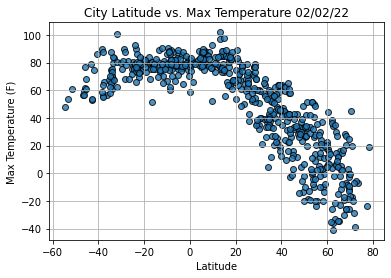

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

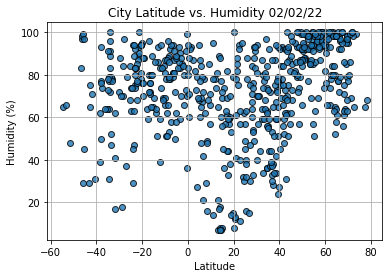

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

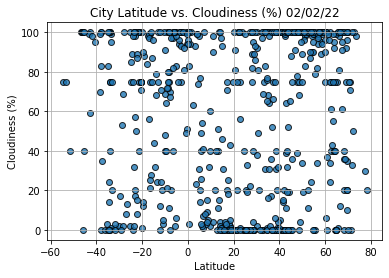

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

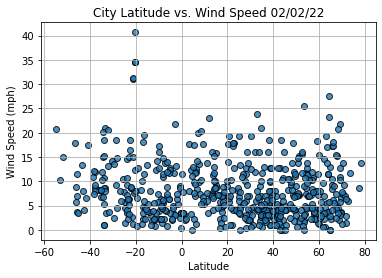

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()